# ML Project: Creating the Dataset

*Note: All datasets were updated in late October, early November.*

*At first, when updating, noticeable changes occurred. Instance count jumped from 50 to 60 to 75 within two weeks. Then, after about a month (early November), changes were insignificant and the number of countries reached its steady state with about 80 countries.*

We'll join multiple datasets on a common feature. The common feature is 'Country'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
cases_data=pd.read_csv("COVID dataset/covid_latest.csv")
population_data=pd.read_csv("COVID dataset/population.csv")
countries_data=pd.read_csv("COVID dataset/countries of the world.csv")
usefulfeatures_data=pd.read_csv("COVID dataset/countries useful features.csv")
GDP_data=pd.read_csv("COVID dataset/GDP.csv")
HF_data=pd.read_csv("COVID dataset/hf score.csv")
literacy1_data=pd.read_csv("COVID dataset/literacy rate 1.csv")

In [35]:
cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               64550 non-null  object 
 1   continent                              64166 non-null  object 
 2   location                               67548 non-null  object 
 3   date                                   67548 non-null  object 
 4   total_cases                            66953 non-null  float64
 5   new_cases                              66951 non-null  float64
 6   new_cases_smoothed                     65950 non-null  float64
 7   total_deaths                           58094 non-null  float64
 8   new_deaths                             58252 non-null  float64
 9   new_deaths_smoothed                    65950 non-null  float64
 10  total_cases_per_million                63960 non-null  float64
 11  ne

Select the desired feature from the datasets then join them. We chose population and density.

Make sure that the column 'Country' is written identicaly 

In [36]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [37]:
population_data=population_data.rename(columns={'Country (or dependency)':'Country','Density (P/Km²)':'Density','Population (2020)':'Population'})

population_data=population_data.filter(items=['Country','Population','Density'])

cases_data=cases_data.rename(columns={'location':'Country'})

cases_data=cases_data.filter(items=['date','Country','total_cases','total_tests','tests_per_case','extreme_poverty','human_development_index','hospital_beds_per_thousand','handwashing_facilities','continent','reproduction_rate','total_deaths','positive_rate'])

result=population_data.join(cases_data.set_index('Country'), on='Country')

Change 'date' from object to datetime. datetime allows us to apply helpful operations of our date features

In [38]:
result['date'] = result['date'].apply(pd.to_datetime)

Only select countries where cases reached at least 1% of its population. 

Apply minimum function. Now the date when cases reached 1% is selected.

In [39]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60899 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     60899 non-null  object        
 1   Population                  60899 non-null  int64         
 2   Density                     60899 non-null  int64         
 3   date                        60844 non-null  datetime64[ns]
 4   total_cases                 60258 non-null  float64       
 5   total_tests                 30280 non-null  float64       
 6   tests_per_case              31698 non-null  float64       
 7   extreme_poverty             40260 non-null  float64       
 8   human_development_index     59430 non-null  float64       
 9   hospital_beds_per_thousand  54965 non-null  float64       
 10  handwashing_facilities      29625 non-null  float64       
 11  continent                   60844 non-null  object      

In [40]:
#mortality_rate=result.loc[result['date']=="2021-02-08"]['total_deaths']/result.loc[result['date']=="2021-02-08"]['total_cases']

In [41]:
#result['mortality_rate']=mortality_rate
#result['reproduction_rate_mortality'] = result.loc[result['date']=="2021-01-22"]['reproduction_rate']
#result['total_deaths_mortality'] = result.loc[result['date']=="2021-02-05"]['total_deaths']

In [42]:
#result[['Country','mortality_rate']]

In [43]:
result2=result.loc[result['total_cases']>=0.05*result['Population']]

result2=result2.set_index('Country')

result2=result2.min(axis=0,level='Country')

In [44]:
result2['mortality_rate'] = result2['total_deaths']/result2['total_cases']

In [45]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Andorra to United States
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Population                  23 non-null     int64         
 1   Density                     23 non-null     int64         
 2   date                        23 non-null     datetime64[ns]
 3   total_cases                 23 non-null     float64       
 4   total_tests                 16 non-null     float64       
 5   tests_per_case              18 non-null     float64       
 6   extreme_poverty             14 non-null     float64       
 7   human_development_index     22 non-null     float64       
 8   hospital_beds_per_thousand  22 non-null     float64       
 9   handwashing_facilities      1 non-null      float64       
 10  continent                   23 non-null     object        
 11  reproduction_rate           22 non-null     floa

Join with the next dataset (countries_data). We'll select 'Climate' from this dataset.

Note: We applied str.strip() to remove spaces from the begining and end of the country column. This dataset (countries of the world) has a space at the begining of each country. To correctly join them the 'Country' column has to be identical. 

In [46]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [47]:
result2=result2.reset_index()

countries_data=countries_data.filter(items=['Country','Region','Climate'])
countries_data['Country']=countries_data['Country'].str.strip()

We noticed that we don't need the feature 'Region' as we'll be using 'continent' from another dataset.

Drop features with NULL climate.

In [48]:
countries_data=countries_data.dropna(subset=["Climate"])
countries_data=countries_data.reset_index(drop=True)

countries_data.drop('Region',axis='columns', inplace=True)

countriesData=result2.set_index('Country').join(countries_data.set_index('Country'))

Join with the next dataset (useful features data). 

We'll select Tourism, Date of first case, Latitude, Longitude, Lockdown date, and Lockdown type.

In [49]:
usefulfeatures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Region           184 non-null    object 
 1   Population_Size          184 non-null    int64  
 2   Tourism                  184 non-null    int64  
 3   Date_FirstFatality       156 non-null    object 
 4   Date_FirstConfirmedCase  184 non-null    object 
 5   Latitude                 184 non-null    float64
 6   Longtitude               184 non-null    float64
 7   Mean_Age                 184 non-null    float64
 8   Lockdown_Date            151 non-null    object 
 9   Lockdown_Type            151 non-null    object 
 10  Country_Code             184 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 15.9+ KB


In [50]:
countriesData=countriesData.reset_index()

usefulfeatures_data=usefulfeatures_data.filter(items=['Country_Region','Tourism','Date_FirstConfirmedCase','Latitude','Longtitude','Lockdown_Date','Lockdown_Type'])
usefulfeatures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Region           184 non-null    object 
 1   Tourism                  184 non-null    int64  
 2   Date_FirstConfirmedCase  184 non-null    object 
 3   Latitude                 184 non-null    float64
 4   Longtitude               184 non-null    float64
 5   Lockdown_Date            151 non-null    object 
 6   Lockdown_Type            151 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.2+ KB


Change date from object to datetime

In [51]:
usefulfeatures_data=usefulfeatures_data.rename(columns={'Country_Region':'Country'})

usefulfeatures_data['Lockdown_Date']=usefulfeatures_data['Lockdown_Date'].apply(pd.to_datetime)
usefulfeatures_data['Date_FirstConfirmedCase']=usefulfeatures_data['Date_FirstConfirmedCase'].apply(pd.to_datetime)

countriesData=countriesData.set_index('Country').join(usefulfeatures_data.set_index('Country'))

Rename the date column. Drop total cases, we don't need it.

In [52]:
countriesData=countriesData.reset_index()

countriesData=countriesData.rename(columns={'date':'Date to reach 1%'})

#countriesData=countriesData.drop(['total_cases'], axis=1)

Join the next dataset (GDP). We'll use the feature GDP from this dataset.

In [53]:
GDP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       260 non-null    object 
 1   Country Code  260 non-null    object 
 2   1990          209 non-null    float64
 3   1991          211 non-null    float64
 4   1992          213 non-null    float64
 5   1993          215 non-null    float64
 6   1994          218 non-null    float64
 7   1995          224 non-null    float64
 8   1996          224 non-null    float64
 9   1997          225 non-null    float64
 10  1998          226 non-null    float64
 11  1999          227 non-null    float64
 12  2000          236 non-null    float64
 13  2001          237 non-null    float64
 14  2002          238 non-null    float64
 15  2003          238 non-null    float64
 16  2004          238 non-null    float64
 17  2005          238 non-null    float64
 18  2006          238 non-null    

In [54]:
GDP_data=GDP_data.filter(items=['Country ','2017','2018'])

GDP_data=GDP_data.rename(columns={'Country ':'Country'})

From the GDP dataset, we'll be using values collected from 2018. Some 2018 values are null so fill them with older 2017 GDP values.

Then, drop 2017 GDP column as we don't need it anymore

In [55]:
GDP_data['2018']=GDP_data['2018'].fillna(GDP_data['2017'])

GDP_data=GDP_data.drop(['2017'], axis=1)

GDP_data=GDP_data.rename(columns={'2018':'GDP 2018'})

countriesData=countriesData.set_index('Country').join(GDP_data.set_index('Country'))

Join the next dataset (HF data). We'll select the human freedom score from this dataset.

In [56]:
HF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 120 entries, year to ef_rank
dtypes: float64(43), int64(13), object(64)
memory usage: 152.0+ KB


In [57]:
HF_data=HF_data.filter(items=['countries','hf_score'])

HF_data=HF_data.rename(columns={'countries':'Country','hf_score':'HF score 2017'})

countriesData=countriesData.reset_index()

countriesData=countriesData.set_index('Country').join(HF_data.set_index('Country'))

In [58]:
countriesData=countriesData.reset_index()
countriesData=countriesData.reset_index()

Join the next dataset (literacy data). We selected the average literacy rate.

In [59]:
literacy1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          150 non-null    object 
 1    literacy_rate_percent_all       150 non-null    object 
 2    male_literacy_percent_rate      150 non-null    float64
 3    female_literacy_percent_rate    150 non-null    float64
 4    gender_difference_percentWorld  150 non-null    float64
 5   86.3                             1 non-null      float64
 6   90.0                             0 non-null      float64
 7   82.7                             0 non-null      float64
 8   7.3	                             0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


In [60]:
literacy1_data=literacy1_data.filter(items=['country',' literacy_rate_percent_all'])

literacy1_data=literacy1_data.rename(columns={'country':'Country',' literacy_rate_percent_all':'literacy rate'})

countriesData=countriesData.set_index('Country').join(literacy1_data.set_index('Country'), on='Country')

countriesData=countriesData.reset_index()

We now have our dataset ready! 

Save it in the project repository.

In [61]:
countriesData.to_csv('Full data333.csv',index=False)

In [62]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     23 non-null     object        
 1   index                       23 non-null     int64         
 2   Population                  23 non-null     int64         
 3   Density                     23 non-null     int64         
 4   Date to reach 1%            23 non-null     datetime64[ns]
 5   total_cases                 23 non-null     float64       
 6   total_tests                 16 non-null     float64       
 7   tests_per_case              18 non-null     float64       
 8   extreme_poverty             14 non-null     float64       
 9   human_development_index     22 non-null     float64       
 10  hospital_beds_per_thousand  22 non-null     float64       
 11  handwashing_facilities      1 non-null      float64       
 

In [63]:
countriesData.loc[countriesData['Country']=='Libya']

,Country,index,Population,Density,Date to reach 1%,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,...,Climate,Tourism,Date_FirstConfirmedCase,Latitude,Longtitude,Lockdown_Date,Lockdown_Type,GDP 2018,HF score 2017,literacy rate


(array([2., 0., 3., 1., 2., 6., 3., 3., 1., 2.]),
 array([0.00169381, 0.00442884, 0.00716388, 0.00989891, 0.01263394,
        0.01536897, 0.018104  , 0.02083903, 0.02357406, 0.02630909,
        0.02904413]),
 <BarContainer object of 10 artists>)

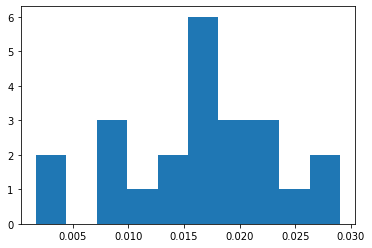

In [64]:
plt.hist(countriesData['mortality_rate'])